In [1]:
%matplotlib notebook

In [2]:
import warnings
warnings.simplefilter('ignore')

import json
import pandas as pd
import pprint
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
with open('data/UNC_OW_9.json') as f:
    org = json.load(f)

    print(json.dumps(org, indent=4))
    travis_white = pd.DataFrame(org["ProductActivity"])

{
    "ProductActivity": [
        {
            "chainId": "13117512170381341801",
            "amount": 1369,
            "createdAt": "2019-07-27T21:30:43+00:00",
            "shoeSize": "9",
            "productId": null,
            "skuUuid": "3f8290c6-f7dd-4710-b8df-f9e9f27e31d6",
            "state": "480",
            "customerId": null,
            "localAmount": 1369,
            "localCurrency": "USD"
        },
        {
            "chainId": "13121025255528006980",
            "amount": 1365,
            "createdAt": "2019-07-26T13:36:04+00:00",
            "shoeSize": "9",
            "productId": null,
            "skuUuid": "3f8290c6-f7dd-4710-b8df-f9e9f27e31d6",
            "state": "480",
            "customerId": null,
            "localAmount": 1365,
            "localCurrency": "USD"
        },
        {
            "chainId": "13115402566081298672",
            "amount": 1350,
            "createdAt": "2019-07-18T19:23:46+00:00",
            "shoeSize": "9",
   

In [4]:
travis_white_data =  travis_white.rename(index=str, columns={"amount": "price", "createdAt": "purchase_date", "skuUuid": "sku", "shoeSize": "shoe_size"})
travis_white_data.head()

price               chainId              purchase_date customerId  \
0  1369.0  13117512170381341801  2019-07-27T21:30:43+00:00       None   
1  1365.0  13121025255528006980  2019-07-26T13:36:04+00:00       None   
2  1350.0  13115402566081298672  2019-07-18T19:23:46+00:00       None   
3  1365.0  13115293250336685806  2019-07-18T15:58:34+00:00       None   
4  1560.0  13114843905544054335  2019-07-18T11:06:03+00:00       None   

   localAmount localCurrency productId shoe_size  \
0         1369           USD      None         9   
1         1365           USD      None         9   
2         1350           USD      None         9   
3         1365           USD      None         9   
4         1560           USD      None         9   

                                    sku state  
0  3f8290c6-f7dd-4710-b8df-f9e9f27e31d6   480  
1  3f8290c6-f7dd-4710-b8df-f9e9f27e31d6   480  
2  3f8290c6-f7dd-4710-b8df-f9e9f27e31d6   480  
3  3f8290c6-f7dd-4710-b8df-f9e9f27e31d6   480  
4  3f8290c6-f7dd-4710-b8df-f9e9f27e31d6   480

In [5]:
travis_white_data =  travis_white_data.rename(index=str, columns={"amount": "price", "createdAt": "purchase_date", "skuUuid": "sku", "shoeSize": "shoe_size"})

In [6]:
new_travis_white_data = travis_white_data[['price', 'purchase_date', 'shoe_size']]
new_travis_white_data.head()

price              purchase_date shoe_size
0  1369.0  2019-07-27T21:30:43+00:00         9
1  1365.0  2019-07-26T13:36:04+00:00         9
2  1350.0  2019-07-18T19:23:46+00:00         9
3  1365.0  2019-07-18T15:58:34+00:00         9
4  1560.0  2019-07-18T11:06:03+00:00         9

In [7]:
size9_travis_white = new_travis_white_data.loc[new_travis_white_data["shoe_size"] == "9", : ]
size9_travis_white.head()

price              purchase_date shoe_size
0  1369.0  2019-07-27T21:30:43+00:00         9
1  1365.0  2019-07-26T13:36:04+00:00         9
2  1350.0  2019-07-18T19:23:46+00:00         9
3  1365.0  2019-07-18T15:58:34+00:00         9
4  1560.0  2019-07-18T11:06:03+00:00         9

In [8]:
newsize9 = size9_travis_white["purchase_date"].str.replace(r"00:00", " ")
newsize9.head()

0    2019-07-27T21:30:43+ 
1    2019-07-26T13:36:04+ 
2    2019-07-18T19:23:46+ 
3    2019-07-18T15:58:34+ 
4    2019-07-18T11:06:03+ 
Name: purchase_date, dtype: object

In [9]:
new2size9 = newsize9.str.replace(r"+", " ")
new2size9.head()

0    2019-07-27T21:30:43  
1    2019-07-26T13:36:04  
2    2019-07-18T19:23:46  
3    2019-07-18T15:58:34  
4    2019-07-18T11:06:03  
Name: purchase_date, dtype: object

In [10]:
new3size9 = new2size9.str.replace(r"T", " ")
new3size9.head()

0    2019-07-27 21:30:43  
1    2019-07-26 13:36:04  
2    2019-07-18 19:23:46  
3    2019-07-18 15:58:34  
4    2019-07-18 11:06:03  
Name: purchase_date, dtype: object

In [11]:
new3size9
new3size_new=[i.split()[0] for i in new3size9]
new3size_new

['2019-07-27',
 '2019-07-26',
 '2019-07-18',
 '2019-07-18',
 '2019-07-18',
 '2019-07-13',
 '2019-07-12',
 '2019-07-12',
 '2019-07-10',
 '2019-07-10',
 '2019-07-08',
 '2019-07-07',
 '2019-07-05',
 '2019-07-05',
 '2019-07-04',
 '2019-07-03',
 '2019-07-03',
 '2019-07-02',
 '2019-07-01',
 '2019-07-01',
 '2019-07-01',
 '2019-07-01',
 '2019-06-30',
 '2019-06-30',
 '2019-06-28',
 '2019-06-27',
 '2019-06-27',
 '2019-06-26',
 '2019-06-26',
 '2019-06-25',
 '2019-06-25',
 '2019-06-24',
 '2019-06-24',
 '2019-06-23',
 '2019-06-22',
 '2019-06-20',
 '2019-06-19',
 '2019-06-18',
 '2019-06-15',
 '2019-06-14',
 '2019-06-14',
 '2019-06-08',
 '2019-06-07',
 '2019-06-07',
 '2019-06-06',
 '2019-06-05',
 '2019-06-04',
 '2019-05-31',
 '2019-05-31',
 '2019-05-31',
 '2019-05-31',
 '2019-05-30',
 '2019-05-29',
 '2019-05-28',
 '2019-05-28',
 '2019-05-27',
 '2019-05-25',
 '2019-05-25',
 '2019-05-25',
 '2019-05-25',
 '2019-05-24',
 '2019-05-23',
 '2019-05-22',
 '2019-05-22',
 '2019-05-22',
 '2019-05-21',
 '2019-05-

In [12]:
size9sum = pd.DataFrame({"Price": size9_travis_white["price"],"Purchase_date": new3size_new, "Shoe_size": size9_travis_white["shoe_size"]})
size9sum.head()

Price Purchase_date Shoe_size
0  1369.0    2019-07-27         9
1  1365.0    2019-07-26         9
2  1350.0    2019-07-18         9
3  1365.0    2019-07-18         9
4  1560.0    2019-07-18         9

In [13]:
size9sum["Purchase_date"] = pd.to_datetime(size9sum["Purchase_date"]).dt.strftime("%Y%m%d")
size9sum.head()

Price Purchase_date Shoe_size
0  1369.0      20190727         9
1  1365.0      20190726         9
2  1350.0      20190718         9
3  1365.0      20190718         9
4  1560.0      20190718         9

In [14]:
#making it into a list and cutting it
purchase = list(size9sum["Purchase_date"])
X = purchase[::-1]

price = list(size9sum["Price"])
Y = price[::-1]


<IPython.core.display.Javascript object>


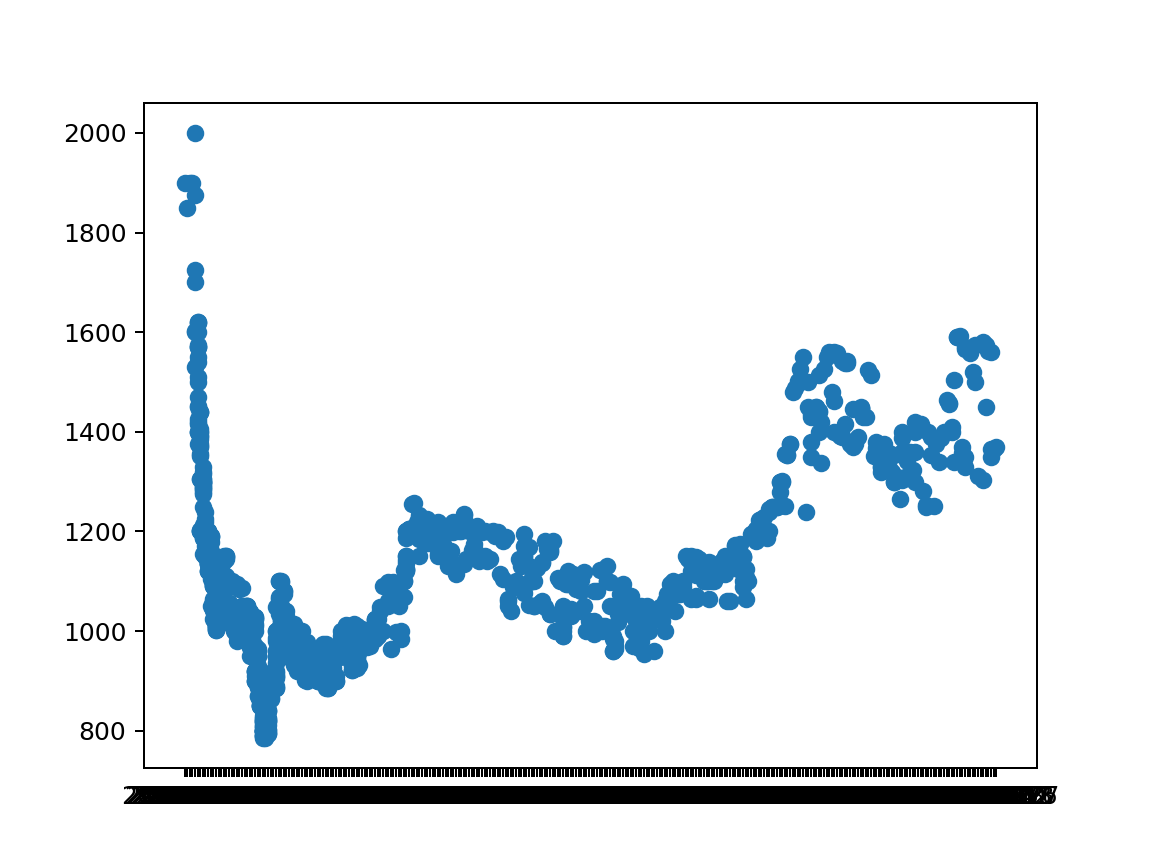

In [15]:
plt.scatter(X, Y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 150, random_state = 0)

In [17]:
X = np.array(X)
X

array(['20180516', '20180517', '20180518', ..., '20190718', '20190726',
       '20190727'], dtype='<U8')

In [18]:
X = X.reshape(-1,1)

X

array([['20180516'],
       ['20180517'],
       ['20180518'],
       ...,
       ['20190718'],
       ['20190726'],
       ['20190727']], dtype='<U8')

In [19]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# X_train
X_test

array(['20190214', '20190712', '20190220', '20180629', '20180531',
       '20180618', '20180529', '20180610', '20180609', '20180617',
       '20180618', '20180623', '20180809', '20180625', '20181220',
       '20190213', '20180523', '20180524', '20180523', '20180722',
       '20180613', '20190126', '20181129', '20180616', '20181015',
       '20180530', '20181114', '20181219', '20180605', '20190505',
       '20180525', '20180621', '20190216', '20181025', '20180720',
       '20180806', '20190113', '20190211', '20180914', '20180803',
       '20180619', '20180827', '20180604', '20180904', '20181126',
       '20180801', '20190215', '20180531', '20190409', '20190426',
       '20180615', '20180619', '20180619', '20190110', '20180814',
       '20180622', '20180624', '20180822', '20180623', '20180718',
       '20180713', '20181130', '20180623', '20180627', '20180724',
       '20181202', '20180624', '20180822', '20180531', '20180525',
       '20181031', '20190520', '20190713', '20180626', '201905

In [20]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

X_test

array([['20190214'],
       ['20190712'],
       ['20190220'],
       ['20180629'],
       ['20180531'],
       ['20180618'],
       ['20180529'],
       ['20180610'],
       ['20180609'],
       ['20180617'],
       ['20180618'],
       ['20180623'],
       ['20180809'],
       ['20180625'],
       ['20181220'],
       ['20190213'],
       ['20180523'],
       ['20180524'],
       ['20180523'],
       ['20180722'],
       ['20180613'],
       ['20190126'],
       ['20181129'],
       ['20180616'],
       ['20181015'],
       ['20180530'],
       ['20181114'],
       ['20181219'],
       ['20180605'],
       ['20190505'],
       ['20180525'],
       ['20180621'],
       ['20190216'],
       ['20181025'],
       ['20180720'],
       ['20180806'],
       ['20190113'],
       ['20190211'],
       ['20180914'],
       ['20180803'],
       ['20180619'],
       ['20180827'],
       ['20180604'],
       ['20180904'],
       ['20181126'],
       ['20180801'],
       ['20190215'],
       ['2018

In [21]:
X_test = X_test.astype(float)

In [22]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
y_pred = regressor.predict(X_test)
y_pred

array([1316.92716887, 1330.94901954, 1317.09610683, 1047.04877788,
       1044.28945786, 1046.73905828, 1044.23314521, 1046.51380767,
       1046.48565134, 1046.71090196, 1046.73905828, 1046.87983992,
       1052.11691667, 1046.93615257, 1063.68916693, 1316.89901254,
       1044.06420725, 1044.09236358, 1044.06420725, 1049.66731626,
       1046.59827665, 1314.44941212, 1061.1269412 , 1046.68274563,
       1057.91711997, 1044.26130154, 1060.7045963 , 1063.6610106 ,
       1046.37302604, 1325.12065992, 1044.1205199 , 1046.82352726,
       1316.98348152, 1058.19868323, 1049.6110036 , 1052.03244769,
       1314.08337987, 1316.84269989, 1055.07333097, 1051.94797871,
       1046.76721461, 1052.62373055, 1046.34486971, 1054.79176771,
       1061.04247222, 1051.89166606, 1316.95532519, 1044.28945786,
       1322.41765256, 1322.89631012, 1046.6545893 , 1046.76721461,
       1046.76721461, 1313.99891089, 1052.25769831, 1046.85168359,
       1046.90799624, 1052.48294892, 1046.87983992, 1049.55469

In [24]:
import pickle
pickle.dump(regressor, open('model4.pkl','wb'))

In [25]:
model = pickle.load( open('model4.pkl','rb'))
print(model.predict([[20210102]]))

[1876.90019338]
